<a href="https://colab.research.google.com/github/KashapovK/collab_ml/blob/main/scraper%20%2B%20tag%20cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#подключаю библиотеку для работы с json и начинаю работу с json файлом
#в 1-й практической работе я пользовался парсером ParseHub, объяснял его работу и прикладывал файл json к ответу, поэтому в этой работе я использую файл из 1й работы.
#json файл приложен к ответу, его попрошу вас самостоятельно подгрузить в среду выполенения: кнопка "загрузить в сессионное хранилище"
import json
with open('run_results.json') as json_file: 
    data = json.load(json_file)

In [ ]:
import requests
import bs4
#перебираю циклом все url
i = 0
while i<=19: #пока номер url в словаре не достигнет 20, цикл будет поочередно парсить и записывать текст в text.txt
  text = requests.get(data['Article'][i]['url'])

  b = bs4.BeautifulSoup(text.text, "html.parser")

  text1 = b.select('article')
  S1 = text1[0].getText()#паршу текст из url номер i в строку S1

  f = open('text.txt', 'a')
  f.write(S1)#записываю в txt файл спаршенный текст
  f.close()

  i += 1

In [ ]:
f = open('text.txt', "r", encoding="utf-8")
text = f.read()
type(text)

str

In [ ]:
text = text.lower() #все перевожу символы в единый регистр (нижний)

In [ ]:
len(text)

117941

In [ ]:
#Использую стандартный набор символов пунктуации из модуля string
import string
string.punctuation
spec_chars = string.punctuation + '–“”—\nt\\i—…«»' #проверил, какие символы надо добавить к стандартному набору

In [ ]:
%%time
#"Для удаления символов используем поэлементную обработку строки
# – разделим исходную строку text на символы, оставим только символы, не входящие в набор spec_chars и снова объединим список символов в строку"
text = "".join([ch for ch in text if ch not in spec_chars]) #

CPU times: user 24.1 ms, sys: 664 µs, total: 24.7 ms
Wall time: 34.9 ms


In [ ]:
len(text)

110516

In [ ]:
import re
text = re.sub('\n', '', text)

In [ ]:
#Объявляю простую функцию, которая удаляет указанный набор символов из исходного текста
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

#"Её можно использовать как для удаления спец.символов, так и для удаления цифр из исходного текста". Делаю, как в примере соотвественно
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [ ]:
len(text)

109431

In [ ]:
print(text) #демонстрирую, что в тексте больше нет символов, цифр итд, т.е. всего, что мы хотели удалить

        ruskar        июля   в   пёрл обновления frefox  до  frefox       был самый обычный будний день  июля мне необходимо было протестировать отображение сайта в разных браузерах для чего я запустил установленный у себя frefox  также у меня на компьютере имеется и frefox  тоже для целей отладки лис тут же выдал сообщение о том что появилась новая версия   и настоятельно предложил обновиться до неё нажимаю обновить устанавливается соединение скачивается  мегабайта обновлений frefox обновляется дальше как обычно  после перезапуска проверяет совместимость дополнений нашёл только несовместимый pencl обновил и его и наконец открывается знакомое окно трёшки fx с заглавием окна frefox успешно обновлён но что я вижу открывается страница mozlla на которой крупными буквами написано сейчас вы используете frefox  надо ли говорить что моему удивлению не было предела лезу в справка  о mozlla frefox и действительно у меня frefox  с интерфейсом от frefox пробую запустить установленный у себя ещё и 

In [ ]:
#Установка зависимостей в колабе из файла со справочными материалами 
%%sh

pip install yargy # для обработки текста 
pip install natasha # для обработки текста 
pip install wordcloud # для создания изображения с облаком тегов

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#в чекинаторе делали это, иначе не работает:)
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#"Для нашей задачи частотного анализа необходимо разбить текст на слова"
#использую готовый метод библиотеки NLTK
from nltk import word_tokenize
text_tokens = word_tokenize(text)
print(type(text_tokens), len(text_tokens))

<class 'list'> 14999


In [ ]:
#"Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку"
import nltk
text = nltk.Text(text_tokens)
print(type(text))

<class 'nltk.text.Text'>


In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(text) #вывожу словарь, содержащий токены и их частоты – количество раз, которые эти слова встречаются в тексте
fdist

FreqDist({'и': 493, 'в': 404, 'web': 218, 'на': 214, 'с': 152, 'что': 150, 'не': 147, 'это': 129, 'как': 95, 'по': 86, ...})

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Получаю список стоп-слов для русского языка
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'he', 'который', 'the', 'свой','стать', 'мочь'])#по результатам работы программы добавил стоп-слова

In [ ]:
#удаляю стоп-слова
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

In [ ]:
text = nltk.Text(text_tokens)

In [ ]:
fdist = FreqDist(text)
fdist

FreqDist({'web': 218, 'сети': 57, 'контента': 43, 'o': 40, 'a': 40, 'and': 37, 'контент': 31, 'данные': 30, 'данных': 30, 'of': 30, ...})

In [ ]:
#лемматизация
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def lemmatize(text):
    words = text # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res
text = lemmatize(text)

In [ ]:
#далее создаю облако тегов

In [ ]:
%matplotlib inline

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text_raw = " ".join(text)

In [ ]:
wordcloud = WordCloud().generate(text_raw)

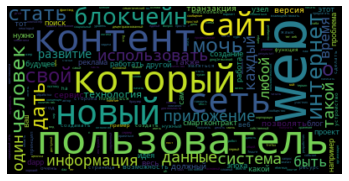

In [ ]:
#лемматизация и удаление стоп-слов выполнены не идеально, по какой-то причине программа не определяет леммы некоторых слов или по просту не удаляет лишние слова,
#которые добавлены в список стоп-слов вручную
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#при выполнении происходит ошибка, не смог разобраться в проблеме. Напишите, пожалуйста, комментарий, почему получается ошибка, ведь код взят из вашего примера и у вас он работает
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)


doc.tag_ner(ner_tagger)
print((doc.spans[0]))
for span in doc.spans:
    span.normalize(morph_vocab)
    
# print({_.text: _.normal for _ in doc.spans})


for span in doc.spans:
    if span.type == PER:
        span.extract_fact(names_extractor)
    
{_.normal: _.fact.as_dict for _ in doc.spans if _.fact}

TypeError: ignored